In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 指数分布验证中心极限定理

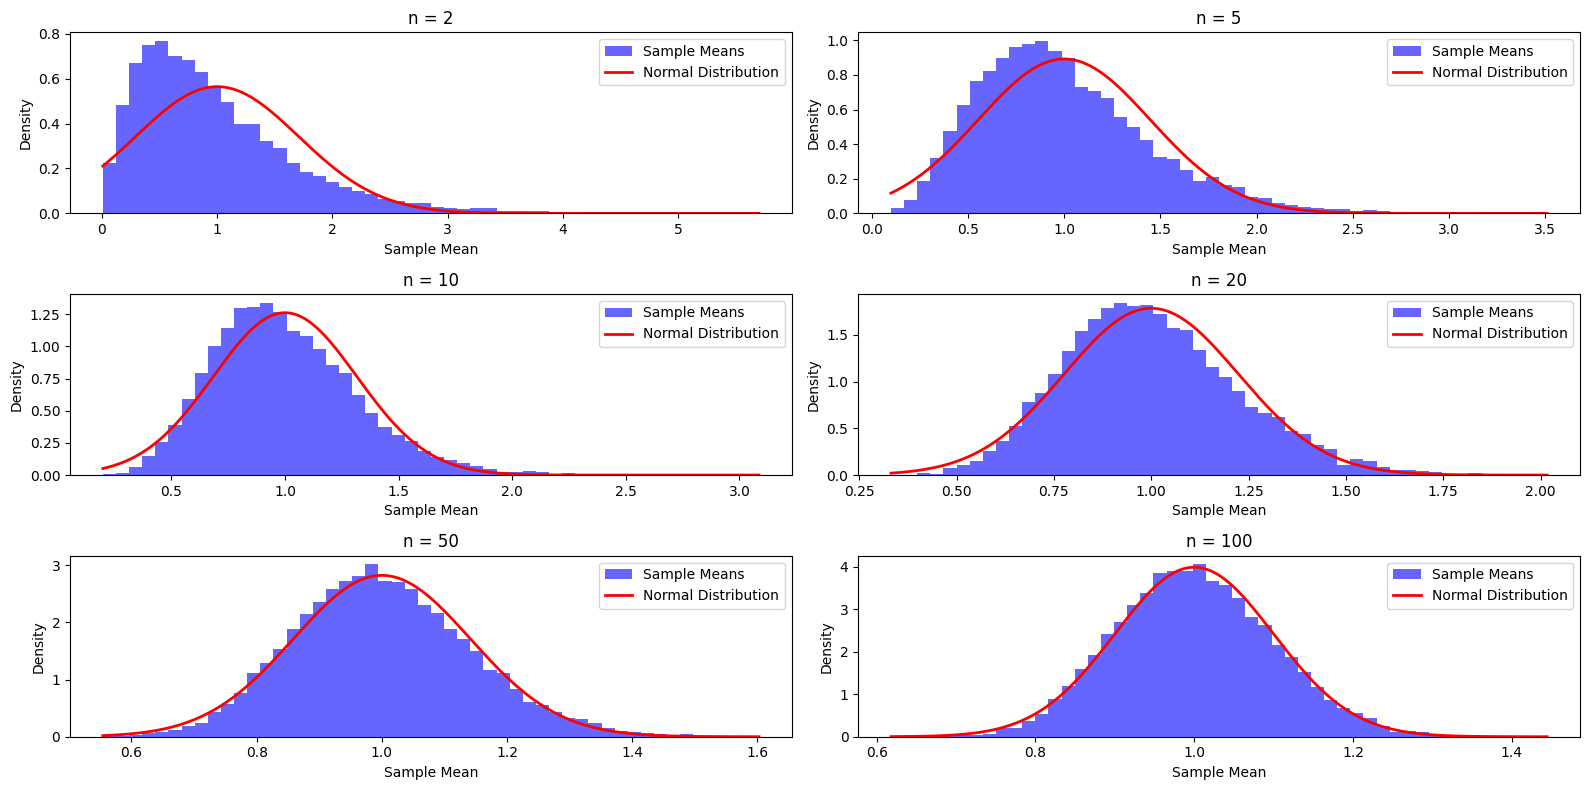

In [5]:
# 参数设置
lambda_param = 1  # 指数分布的 λ
n_values = [2, 5, 10, 20,50,100]  # 不同的样本大小 n
N = 10000  #重复实验次数

# 理论均值和标准差
mu = 1 / lambda_param
sigma = 1 / lambda_param

# 绘图
plt.figure(figsize=(16, 8))

for i, n in enumerate(n_values):
    # 生成样本均值
    sample_means = [np.mean(np.random.exponential(scale=1/lambda_param, size=n)) for _ in range(N)]
    
    # 绘制直方图
    plt.subplot(3, 2, i+1)
    plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='b', label="Sample Means")
    
    # 理论正态分布
    x = np.linspace(min(sample_means), max(sample_means), 1000)
    plt.plot(x, norm.pdf(x, mu, sigma/np.sqrt(n)), 'r-', lw=2, label="Normal Distribution")
    
    # 添加标签
    plt.title(f"n = {n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


## 郎道分布验证中心极限定理

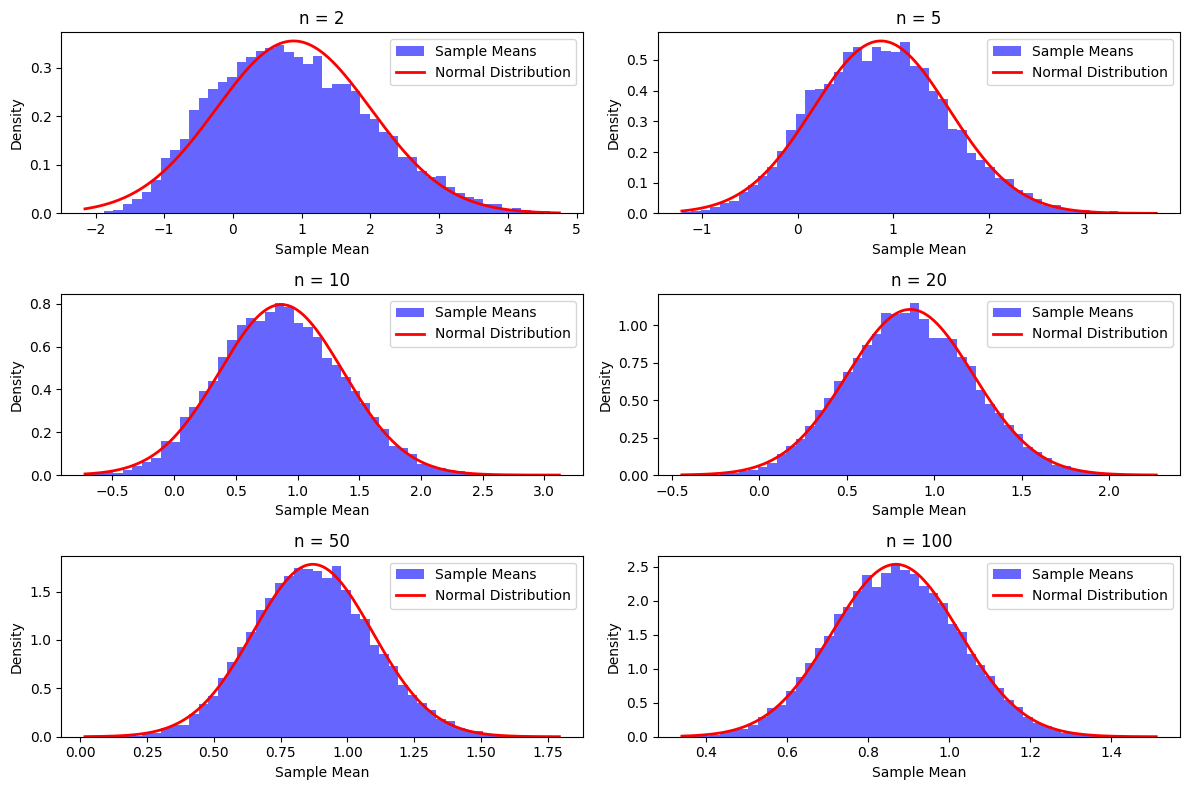

In [8]:
# 郎道分布的概率密度函数
def landau_pdf(x):
    return np.exp(-0.5 * (x + np.exp(-x))) / np.sqrt(2 * np.pi)

# 生成郎道分布随机样本
def landau_rvs(size):
    # 使用拒绝采样法生成郎道分布随机数
    x_min, x_max = -5, 5  # 定义生成范围
    samples = []
    while len(samples) < size:
        # 在 [x_min, x_max] 内均匀采样
        x_candidate = np.random.uniform(x_min, x_max, size * 2)
        # 在 [0, landau_pdf(0)] 内采样概率值
        y_candidate = np.random.uniform(0, landau_pdf(0), size * 2)
        # 拒绝采样
        valid = y_candidate < landau_pdf(x_candidate)
        samples.extend(x_candidate[valid])
    return np.array(samples[:size])

# 参数设置
n_values = [2, 5, 10, 20, 50, 100]  # 不同的样本大小 n
N = 10000  # 重复实验次数

# 绘图
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_values):
    # 生成样本均值
    sample_means = [np.mean(landau_rvs(n)) for _ in range(N)]
    
    # 绘制直方图
    plt.subplot(3, 2, i+1)
    plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='b', label="Sample Means")
    
    # 理论正态分布
    mean = np.mean(sample_means)  # 样本均值
    std = np.std(sample_means)   # 样本标准差
    x = np.linspace(min(sample_means), max(sample_means), 1000)
    plt.plot(x, norm.pdf(x, loc=mean, scale=std), 'r-', lw=2, label="Normal Distribution")
    
    # 添加标签
    plt.title(f"n = {n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

#### 求飞行时间法测中子能量方法的相对误差公式 R(E)=δE/E, 装置以及符号参考第二章课件。

能量的公式为：
$$
E_n(L,TOF)=\frac{m_nL^2}{2TOF^2}
$$

其中：
$$
L:L_0 \pm \sigma_L 
$$
$$
TOF:TOF_0 \pm \sigma_{TOF}
$$


根据误差传递公式：
$$
\sigma_{f}^2=\Sigma_i (\frac{\partial f}{\partial x_i})^2 \sigma_{x_i}^2 + \Sigma_i \Sigma_j (\frac{\partial f}{\partial x_i} \frac{\partial f}{\partial x_j} ) \mathtt{cov} (x_i,x_j)
$$



可以解得：
$$
\frac{\partial E_n(L,TOF)}{\partial m_n}  = \frac{L^2}{2TOF^2}
$$
$$
\frac{\partial E_n(L,TOF)}{\partial L}   = \frac{2m_nL}{2TOF^2} = \frac{m_nL}{TOF^2}
$$
$$
\frac{\partial E_n(L,TOF)}{\partial TOF}  =- \frac{2m_nL^2}{2TOF^3} =- \frac{m_nL^2}{TOF^3}
$$


因此：
$$
\delta E^2 =  (\frac{\partial E_n(L,TOF)}{\partial m_n} )^2 \delta m_n^2 +(\frac{\partial E_n(L,TOF)}{\partial L} )^2   \delta m_n^2
+(\frac{\partial E_n(L,TOF)}{\partial TOF} )^2  \delta TOF^2
$$
$$
=  
(\frac{L^2}{2TOF^2})^2\delta m_n^2 + (\frac{m_nL}{TOF^2})^2 \delta m_n^2+(\frac{m_nL^2}{TOF^3})^2 \delta TOF^2
$$

因此:
$$
\frac{\delta E^2}{E^2} = \frac{\delta m_n^2}{m_n^2} + 4\frac{\delta L^2}{L^2}  + 4\frac{\delta TOF^2}{TOF^2} 
$$


可以得到行时间法测中子能量方法的相对误差公式:
$$
R(E)=\frac{\delta E}{E} = \sqrt{\frac{\delta m_n^2}{m_n^2} + 4\frac{\delta L^2}{L^2}  + 4\frac{\delta TOF^2}{TOF^2}}
$$